In [ ]:
!pip install shap==0.43.0
!pip install numpy==1.26.4


In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm
print(mpl.__version__)

!wget -O TimesNewRoman.ttf https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf
font_dirs = ["/content/"]
font_files = fm.findSystemFonts(fontpaths=font_dirs, fontext='ttf')
for font_file in font_files:
    print(font_file) if 'TimesNewRoman' in font_file else None
    fm.fontManager.addfont(font_file)

3.10.0
--2025-03-27 11:19:09--  https://github.com/justrajdeep/fonts/raw/master/Times%20New%20Roman.ttf
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf [following]
--2025-03-27 11:19:09--  https://raw.githubusercontent.com/justrajdeep/fonts/master/Times%20New%20Roman.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 834452 (815K) [application/octet-stream]
Saving to: ‘TimesNewRoman.ttf’

TimesNewRoman.ttf   100%[===================>] 814.89K  --.-KB/s    in 0.05s   

2025-03-27 11:19:09 (16.9 MB/s) - ‘TimesNewRoman.ttf’ saved [834452/834452]

/c

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import shap
import pickle
import matplotlib.pyplot as plt
print(shap.__version__)
print(np.__version__)

0.43.0
1.26.4


In [ ]:
Modle_Path=r'/content/drive/MyDrive/TreeSpecies/l0.pkl'
with open(Modle_Path, 'rb') as f:
    M = pickle.load(f)
list(M.classes_)


Trying to unpickle estimator LabelEncoder from version 1.2.2 when using version 1.6.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations


['cleared', 'forest']

In [ ]:
X_NewName=[
  'NIR/Red','GSAVI','SWIR2/SWIR1','SWIR1/Green','B8A','NDVI','SWIR1/NIR','SWIR1/Red','NBR','B11','B12' ,'SAVI','SWIR2/Green','MSR','MSAVI'
,'SWIR2/NIR','B2','GDVI','B3','SWIR2/Red','NDII', 'B4' ,'B5', 'B6','Red/Green','B7' ,'DVI' ,'B8','CVI', 'NIR/Green','NDGI','GNDVI','CR','DPSVI','DPSVIo' ,'VH','VV'
,'B11*','B12*','B2*','B3*','B4*','B5*','B6*','B7*','B8*','B8A*'
,'CR*','CVI','DPSVI*','DPSVIo*','DVI','GDVI*','GNDVI*','GSAVI*'
,'MSAVI*','MSR*','NBR*','NDGI*','NDII*','NDVI*','(NIR/Green)*','(NIR/Red)*','(Red/Green)*','(SWIR1/Green)*','(SWIR1/NIR)*','(SWIR1/Red)*','(SWIR2/Green)*'
    ,'(SWIR2/NIR)*','(SWIR2/Red)*','SAVI*','VH*','VV*','(SWIR2/SWIR1)*','Median','Mean','STD','MAX','MIN','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']
len(X_NewName)

89

In [ ]:
pathDF=r'/content/drive/MyDrive/TreeSpecies/FinalDS_Clean.csv'
df = pd.read_csv(pathDF)
X_OldName=['NR' ,'GSAVI' ,'SWIR21' ,'S1G', 'B8A' ,'NDVI', 'S1N',
 'S1R','NBR','B11','B12','SAVI','S2G','MSR','MSAVI',
 'S2N','B2','GDVII','B3','S2R' ,'NDII', 'B4' ,'B5', 'B6' ,'RG' ,'B7' ,'DVI' ,'B8',
 'CVI','NG','NDGI','GNDVI','CR','DPSVI','DPSVIo','Sigma0_VH','Sigma0_VV',
 'C_B11','C_B12','C_B2','C_B3','C_B4','C_B5','C_B6','C_B7','C_B8','C_B8A',
 'C_CR','C_CVI','C_DPSVI','C_DPSVIo','C_DVI','C_GDVII','C_GNDVI','C_GSAVI',
 'C_MSAVI','C_MSR','C_NBR','C_NDGI','C_NDII','C_NDVI','C_NG','C_NR' ,'C_RG',
 'C_S1G' ,'C_S1N' ,'C_S1R' ,'C_S2G' ,'C_S2N', 'C_S2R' ,'C_SAVI' ,'C_Sigma0_VH'
 ,'C_Sigma0_VV' ,'C_SWIR21','Median','Mean','STD','MAX','MIN','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10']

XX=df[X_OldName]
XX

,NR,GSAVI,SWIR21,S1G,B8A,NDVI,S1N,S1R,NBR,B11,...,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10
0,18.526739,0.593954,0.453592,5.265250,0.440767,0.893179,0.470160,8.548635,0.648774,0.193644,...,18.9,19.0,20.0,20.0,21.0,21.0,22.0,23.0,24.0,25
1,20.850943,0.592502,0.446866,4.864805,0.387933,0.905894,0.413239,8.537932,0.688414,0.167622,...,22.0,22.0,23.0,23.0,23.0,23.0,23.0,23.0,24.0,25
2,19.945640,0.605654,0.440426,4.761519,0.398078,0.901021,0.401142,7.881780,0.699643,0.169156,...,22.0,22.0,22.0,23.0,23.0,23.0,23.0,23.0,23.0,24
3,16.820724,0.541139,0.486547,3.689111,0.340744,0.881255,0.438768,7.276369,0.648975,0.165811,...,2.0,2.0,3.0,3.0,3.0,3.0,4.0,4.0,4.0,5
4,18.913340,0.557265,0.439871,4.294588,0.427689,0.892244,0.463389,8.470448,0.661861,0.177122,...,19.0,19.0,19.0,19.0,20.0,20.0,20.0,20.0,20.0,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21054,16.719385,0.566047,0.455464,4.301752,0.416792,0.874571,0.440657,6.928330,0.666787,0.169277,...,17.0,17.0,17.0,18.0,18.0,18.0,18.0,18.0,18.0,18
21055,19.899582,0.601307,0.429765,3.448967,0.427033,0.897314,0.376490,7.427852,0.721449,0.170483,...,2.0,4.0,4.7,5.6,7.0,9.0,10.0,11.2,13.0,18
21056,19.116239,0.606214,0.412743,3.515900,0.437333,0.892475,0.358774,6.675862,0.742269,0.159667,...,15.0,15.0,15.0,15.0,15.0,16.0,16.0,16.0,16.0,17
21057,16.274094,0.539047,0.430025,3.452425,0.397675,0.860789,0.406388,6.588813,0.702575,0.158775,...,25.0,25.0,25.0,26.0,26.0,26.0,27.0,27.0,27.0,27


In [ ]:
explainer = shap.TreeExplainer(M, model_output="raw", approximate=True)
# Compute SHAP values
shap_values = explainer.shap_values(XX,check_additivity=False)

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


In [ ]:
print(type(shap_values))
print(np.shape(shap_values))

<class 'list'>
(2, 21059, 89)


(2, 21059, 89)


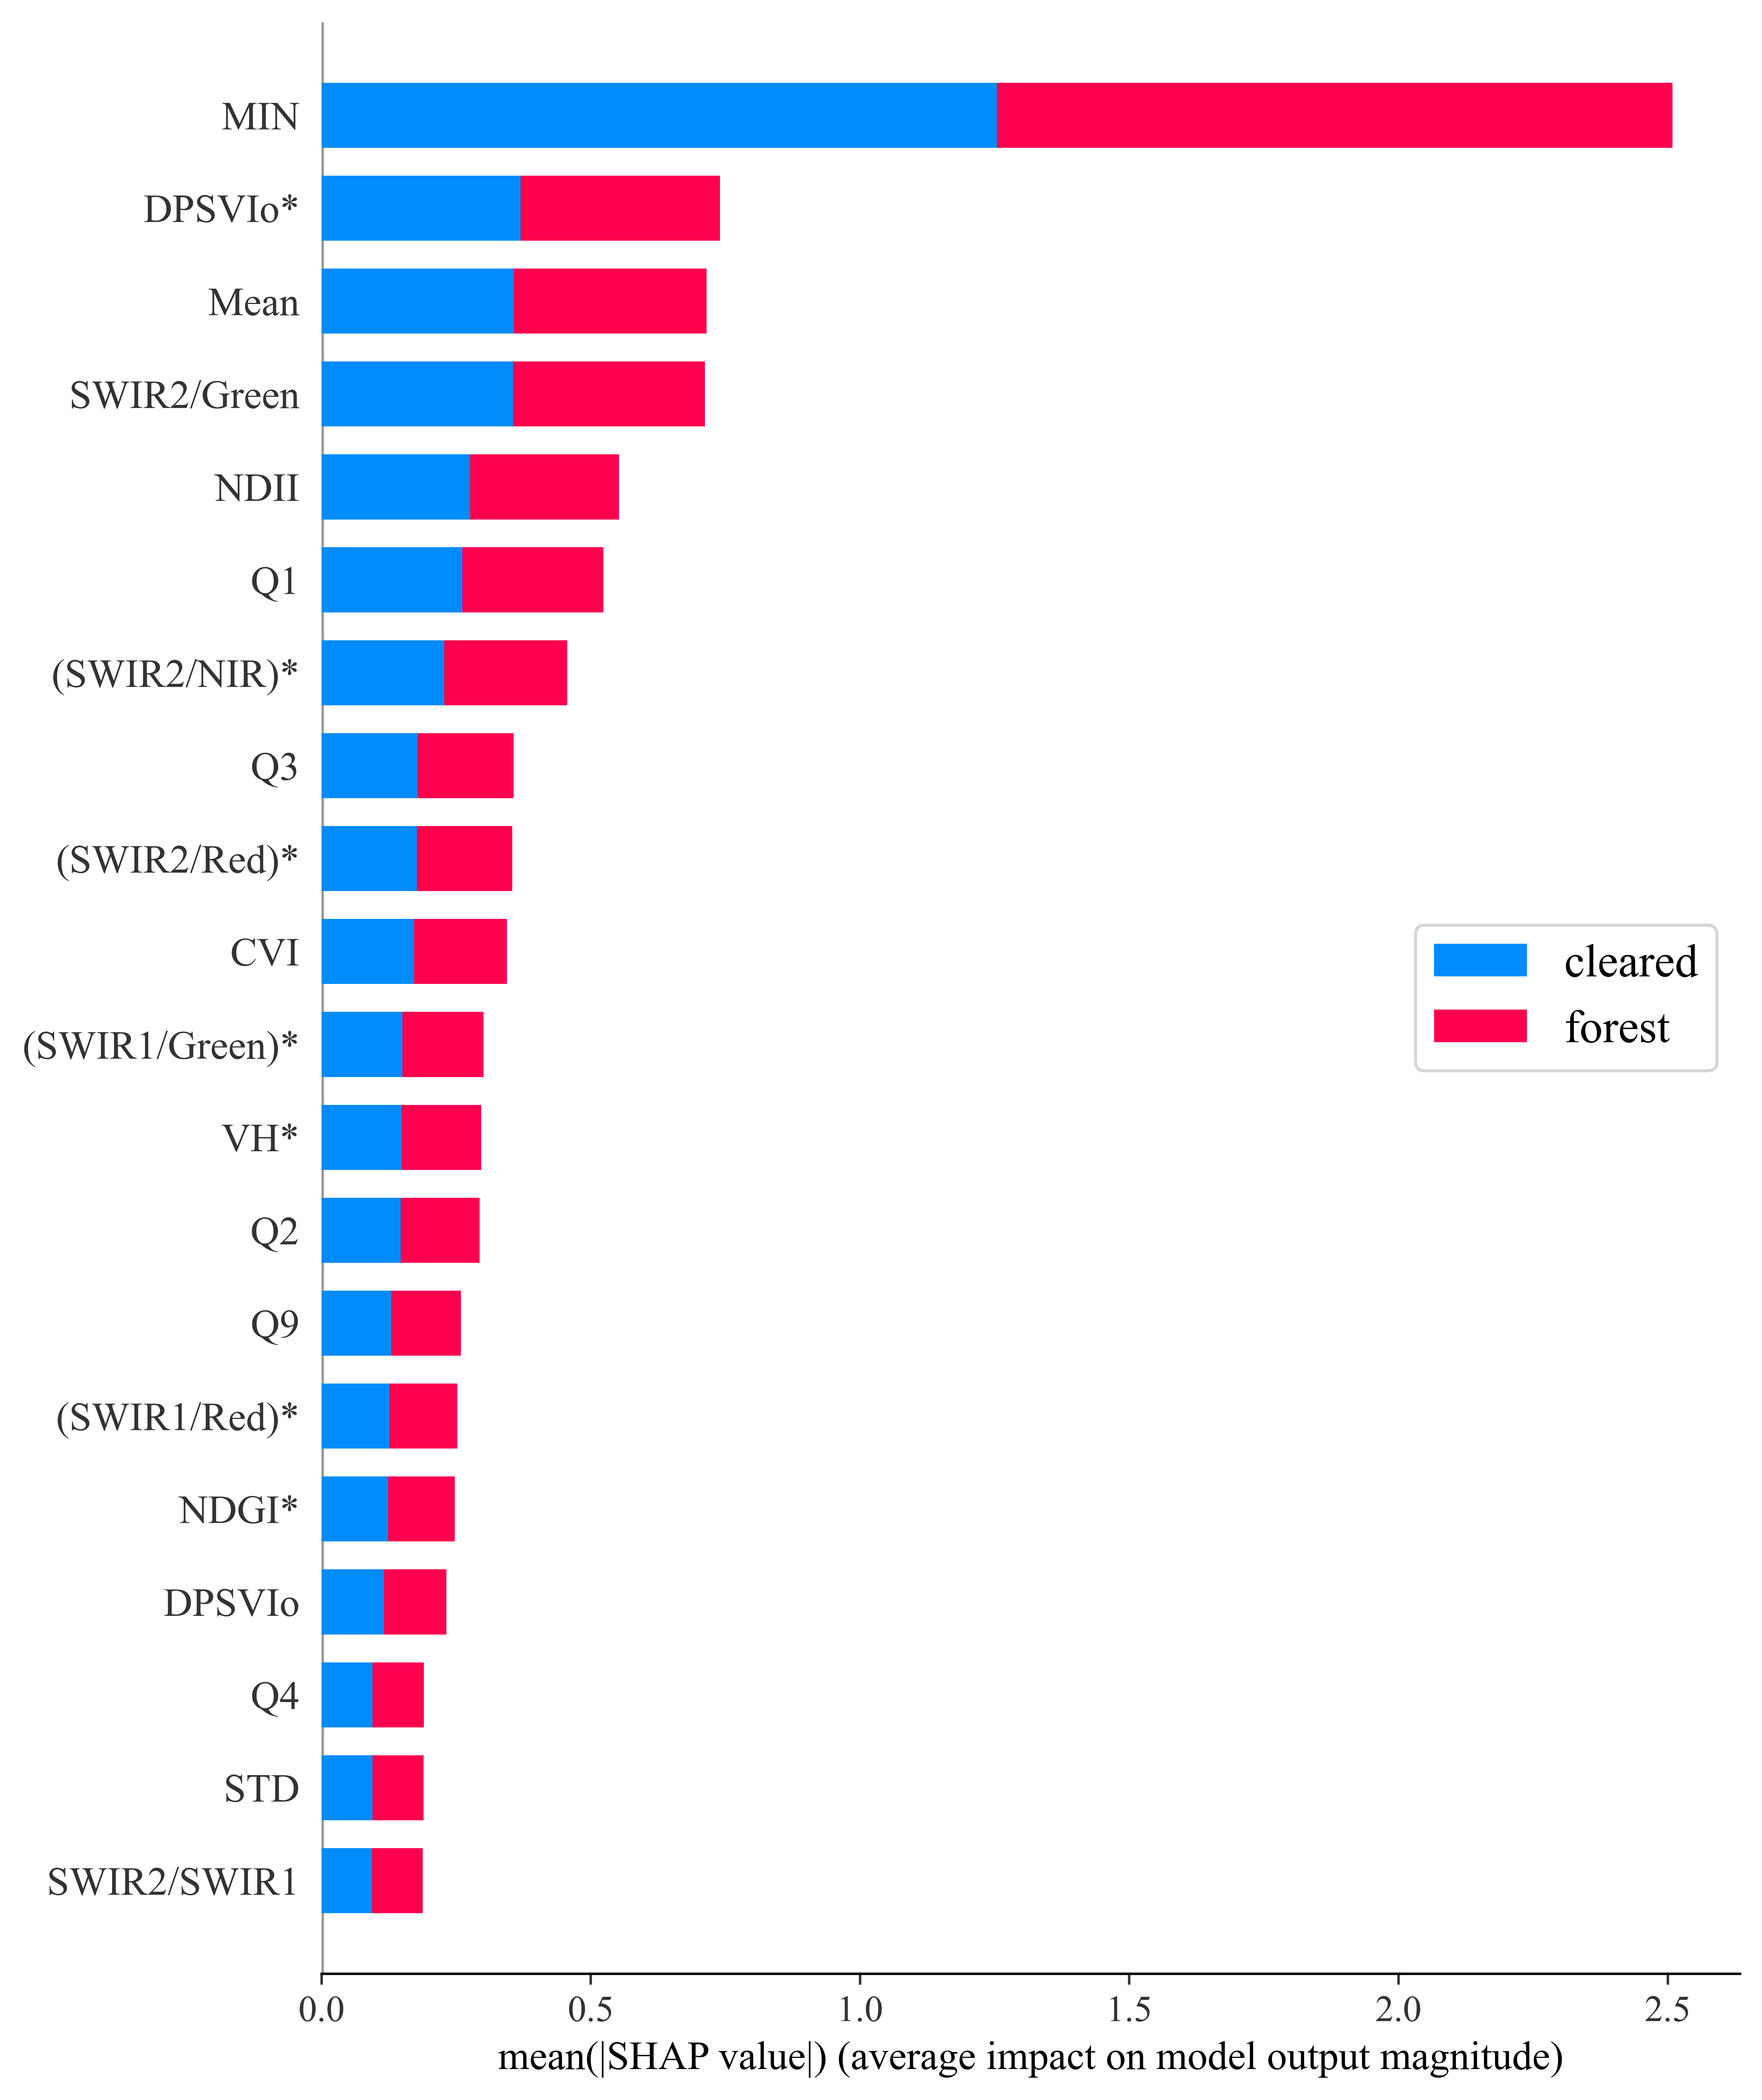

In [ ]:
plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(12, 8), dpi=800)

print(np.shape(shap_values))
shap.summary_plot(shap_values,XX,feature_names=X_NewName,class_names=list(M.classes_),show=False,plot_type='bar')
ax = plt.gca()
plt.legend(title='',loc='center right',fontsize=15)
plt.xticks(fontsize=12)
plt.show()


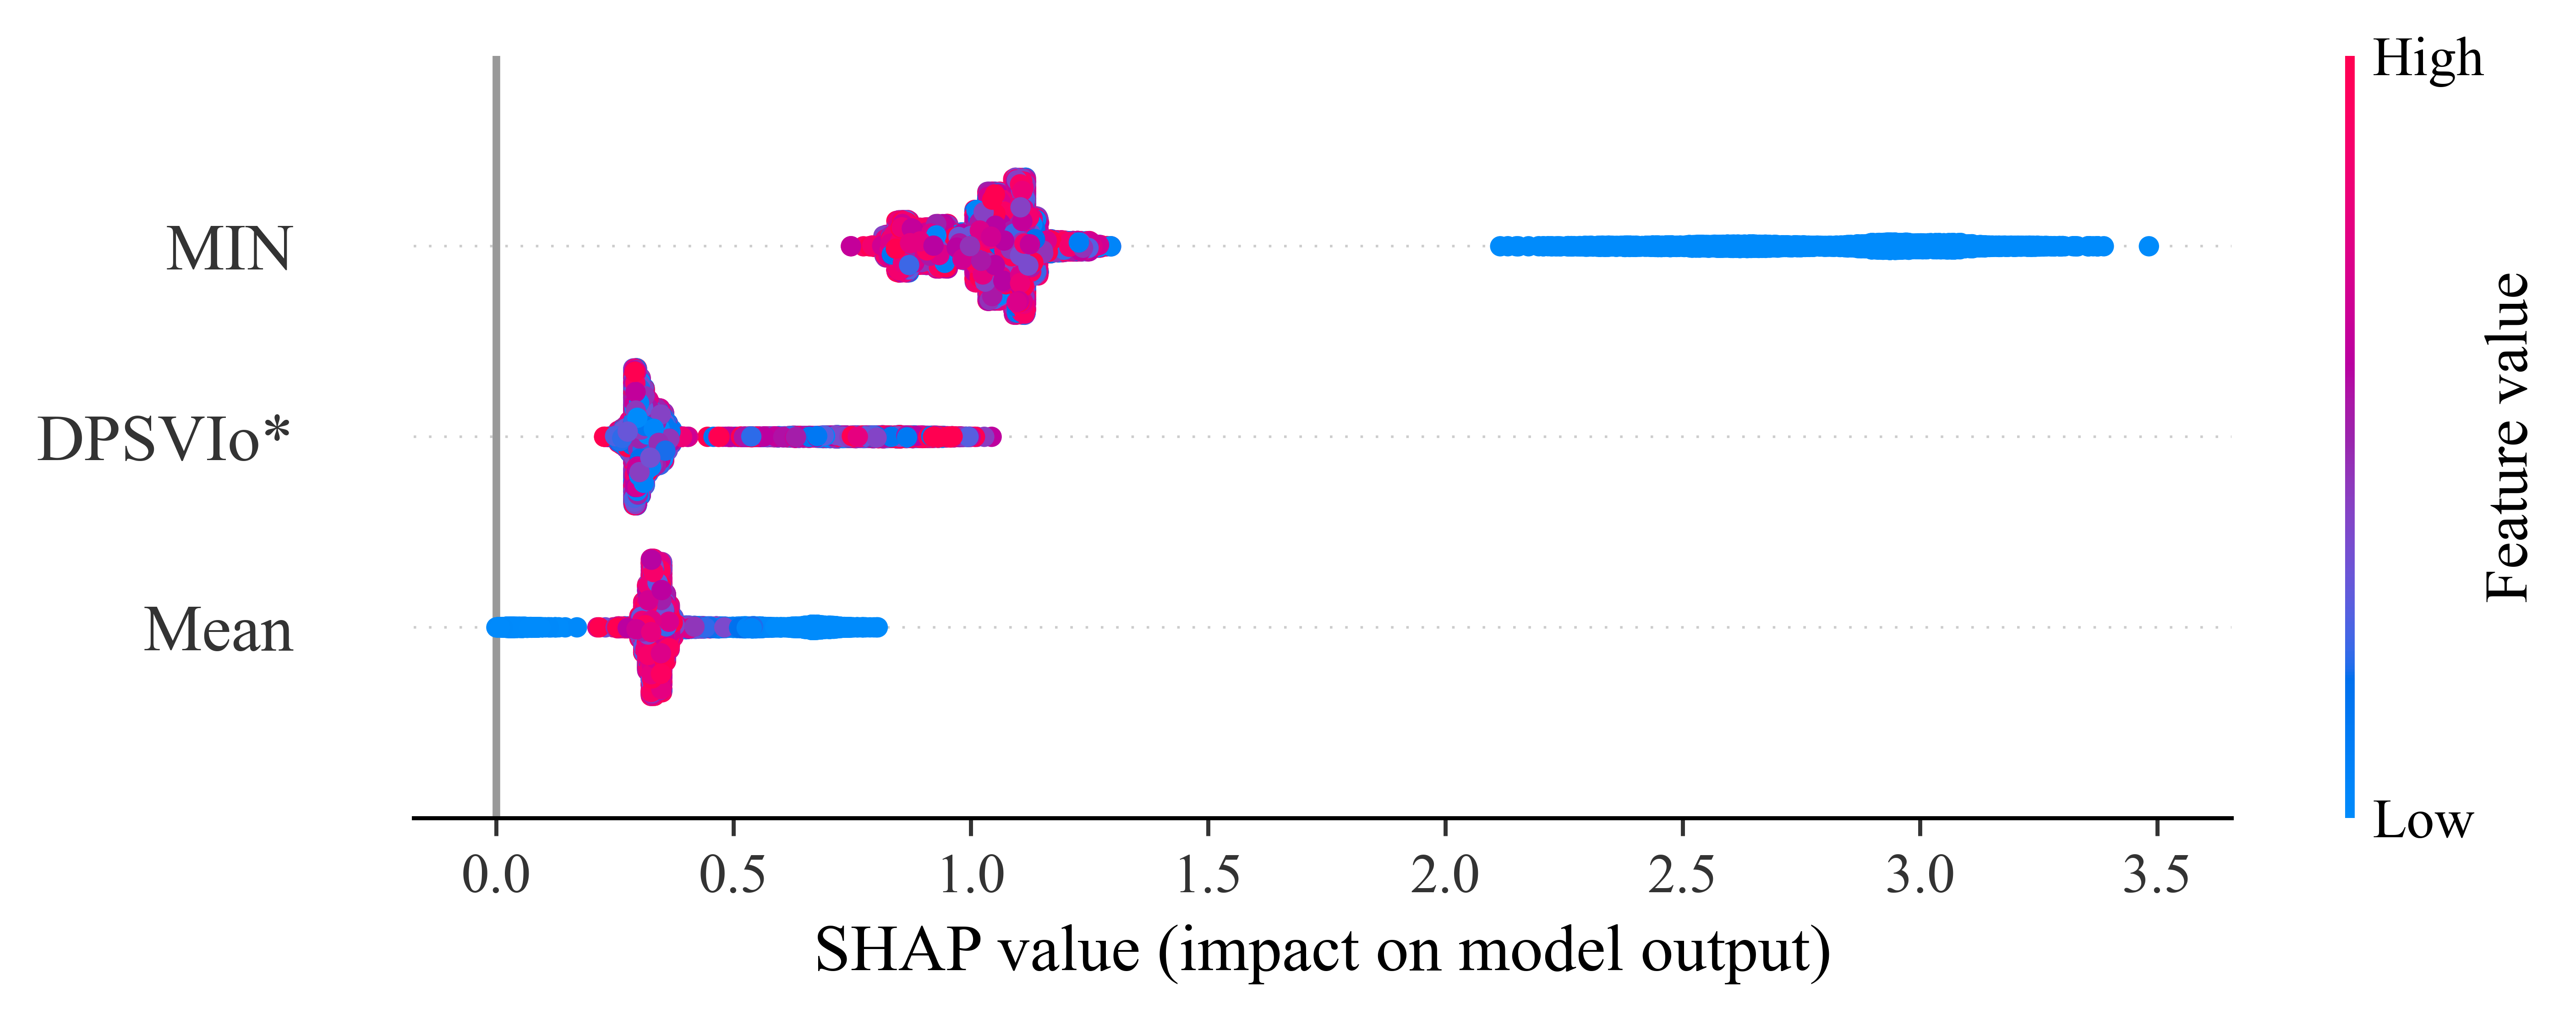

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


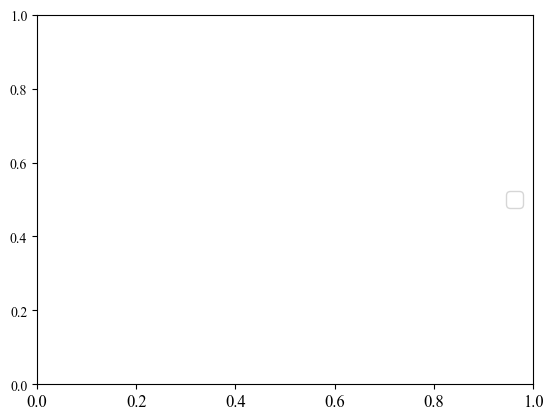

In [ ]:

# Compute mean absolute SHAP values across classes (reduce 1st axis)
shap_values_combined = np.mean(np.abs(shap_values), axis=0)  # (21059, 89)

# Select three most important features (based on mean importance)
top_features_idx = np.argsort(np.mean(np.abs(shap_values_combined), axis=0))[-3:]  # Select top 3

# Extract SHAP values for the top features
shap_values_combined_top = shap_values_combined[:, top_features_idx]  # (21059, 3)

# Extract corresponding feature values for coloring
feature_values_top = XX.iloc[:, top_features_idx].values  # (21059, 3)

# Map indices to full feature names using `X_NewName`
top_feature_names = [X_NewName[i] for i in top_features_idx]

# Create SHAP Explanation object with feature values
shap_combined = shap.Explanation(
    values=shap_values_combined_top,  # SHAP values
    base_values=None,  # Not required for visualization
    data=feature_values_top,  # Feature values for color mapping
    feature_names=top_feature_names  # Use full feature names from X_NewName
)

# Plot beeswarm for the three most important features

plt.rcParams["font.family"] = "Times New Roman"
plt.figure(figsize=(12, 8), dpi=800)

shap.plots.beeswarm(shap_combined, max_display=3)
ax = plt.gca()
plt.legend(title='', loc='center right', fontsize=15)
plt.xticks(fontsize=12)
plt.show()

Index(['name', 'Importance', 'Category'], dtype='object')


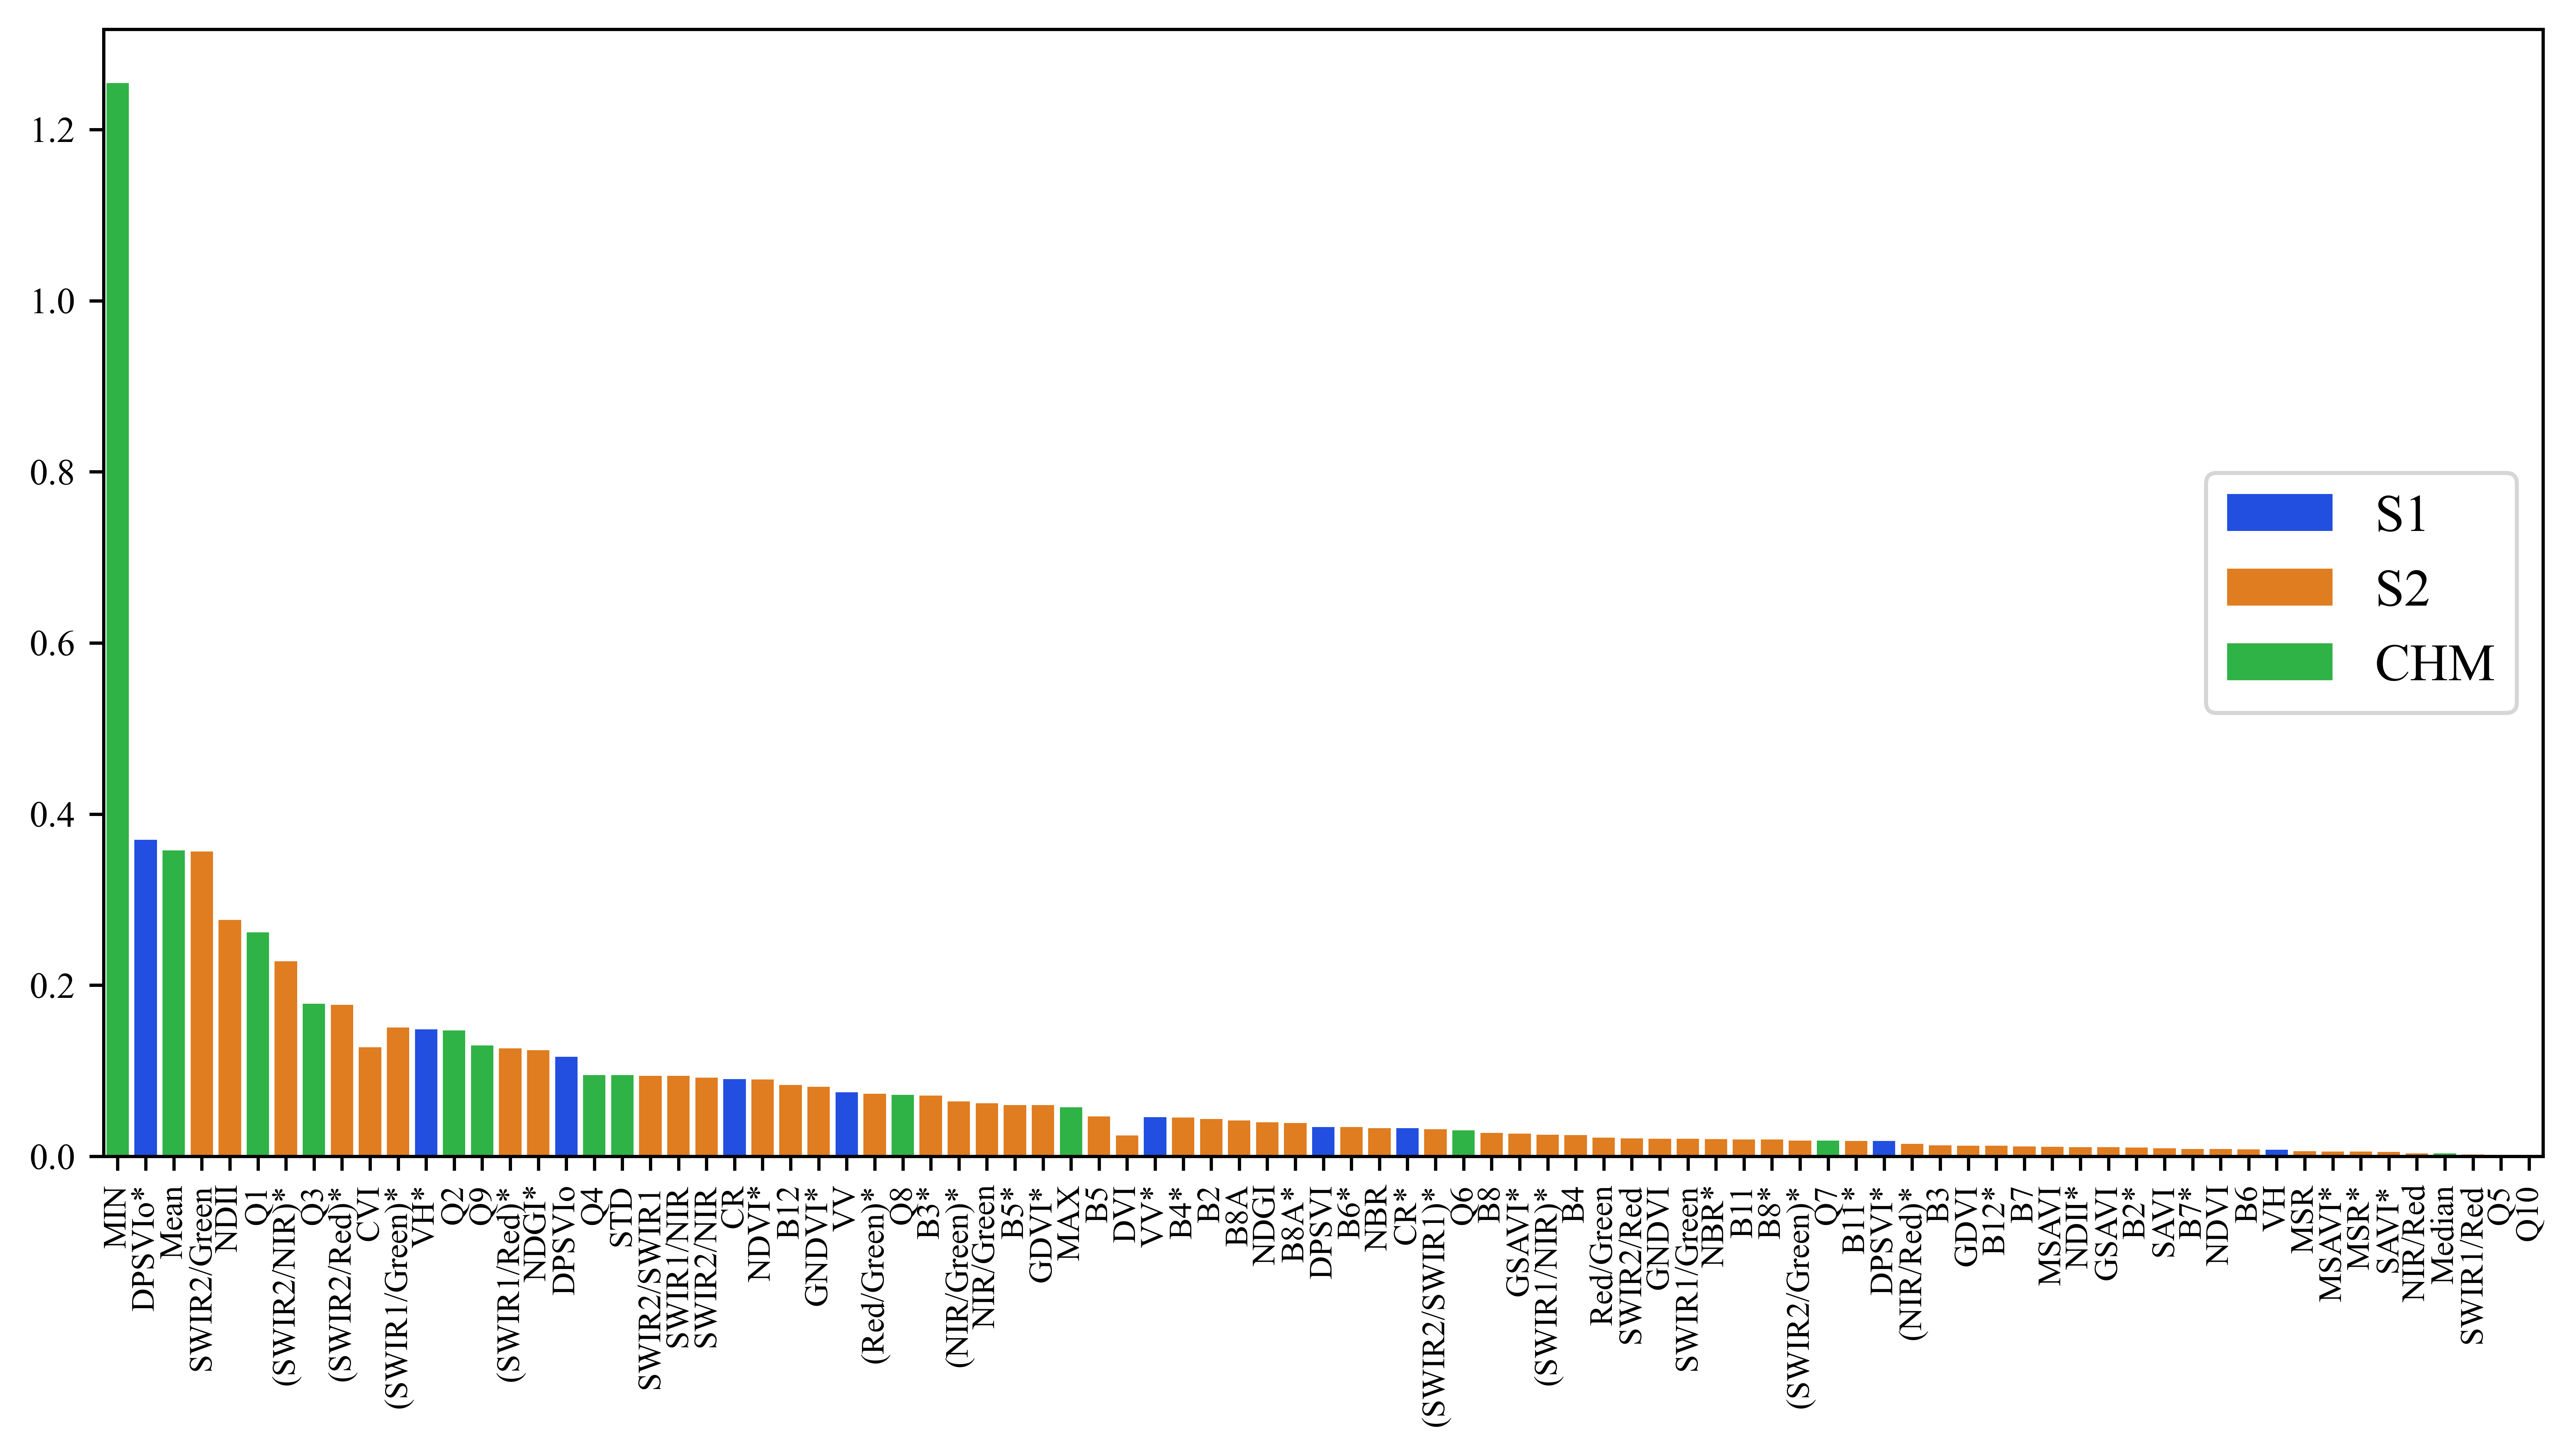

In [ ]:
import seaborn as sns
feature_names = X_NewName

# Compute mean absolute SHAP values across classes (reduce 1st axis)
shap_values_combined = np.mean(np.abs(shap_values), axis=0)  # (21059, 89)
shap_importance = np.mean(np.abs(shap_values_combined), axis=0)

sorted_idx = np.argsort(shap_importance)[::-1]

# ایجاد دیتافریم برای نمایش ویژگی‌ها و اهمیت آنها
df_FI = pd.DataFrame({'name': [feature_names[i] for i in sorted_idx], 'Importance': shap_importance[sorted_idx]})

# تعریف دسته‌بندی‌ها
Hue_Featuer_Map = {
    'CHM': ['Median','Mean','STD','MAX','MIN','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q9','Q10'],
    'S1': ['VH*','VV*','CR','DPSVI','DPSVIo' ,'VH','VV','DPSVI*','DPSVIo*','CR*'],
    'S2': ['(SWIR2/NIR)*','(SWIR2/Red)*','SAVI*','(SWIR2/SWIR1)*','MSAVI*','MSR*','NBR*','NDGI*','NDII*','NDVI*','(NIR/Green)*','(NIR/Red)*','(Red/Green)*','(SWIR1/Green)*','(SWIR1/NIR)*','(SWIR1/Red)*','(SWIR2/Green)*',
           'CVI','DVI','GDVI*','GNDVI*','GSAVI*','B2*','B3*','B4*','B5*','B6*','B7*','B8*','B8A*','B11*','B12*',
           'SWIR2/NIR','B2','GDVI','B3','SWIR2/Red','NDII', 'B4' ,'B5', 'B6','Red/Green','B7' ,'DVI' ,'B8','CVI', 'NIR/Green','NDGI','GNDVI','NIR/Red','GSAVI','SWIR2/SWIR1','SWIR1/Green','B8A','NDVI','SWIR1/NIR','SWIR1/Red','NBR','B11','B12' ,'SAVI','SWIR2/Green','MSR','MSAVI']
}

# تابع برای دریافت دسته‌بندی هر ویژگی
def get_category(name):
    for category, values in Hue_Featuer_Map.items():
        if name in values:
            return category
    return 'Unknown'  # Default category if not found

# اعمال تابع دسته‌بندی به دیتافریم
df_FI['Category'] = df_FI['name'].apply(get_category)
print(df_FI.columns)

# افزایش اندازه‌ی شکل
plt.figure(figsize=(10.75, 5), dpi=800)

# تنظیم فونت
plt.rc('font', family='Times New Roman')

palette = sns.color_palette('bright')  # You can choose any other palette
# Assign colors from the bright palette
custom_palette = {
    'CHM': palette[2],  # Blue
    'S1': palette[0],  # Orange
    'S2': palette[1]   # Green
}


# Create the bar plot with the custom color mapping
ax = sns.barplot(data=df_FI, x='name', y='Importance', hue='Category',
                 errorbar=None, palette=custom_palette, dodge=False, edgecolor=None)

# Manually sort the legend to CHM → S1 → S2
handles, labels = ax.get_legend_handles_labels()
sorted_handles_labels = [(h, l) for l, h in sorted(zip(labels, handles), key=lambda x: ['S1', 'S2', 'CHM'].index(x[0]))]
sorted_handles, sorted_labels = zip(*sorted_handles_labels)

# Adjust legend
plt.legend(sorted_handles, sorted_labels, title='', loc='center right', fontsize=13)

# حذف برچسب‌های محورهای X و Y
plt.xlabel('')
plt.ylabel('')

# تنظیم فونت و چرخش نوشته‌های محور X
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=9)

plt.show()